In [4]:
import numpy as np
import wandb
import optuna
from optuna.integration.wandb import WeightsAndBiasesCallback
import lightning as L
from lightning.pytorch.loggers import WandbLogger

from lightning_modules import Base_Model, Hinton_Distillation, All_Connections_Distillation
from cifar_dataset import cifar10_loader
from cifar_tiny import Cifar_Tiny
from cifar_very_tiny import Cifar_Very_Tiny

## Данные

In [5]:
train_loader, test_loader = cifar10_loader(batch_size=128, maxsize=10112)

Files already downloaded and verified
Files already downloaded and verified


## Без Дистилляции

### Модель Tiny

In [4]:
for _ in range(2):
    with wandb.init() as run:
        wandb.log({
            "model_name": "tiny",
            "distillation_type": "without",
        })
        model = Base_Model(Cifar_Tiny(10))
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 119.14it/s, v_num=t49l]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 117.90it/s, v_num=t49l]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/5topt49l/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/5topt49l/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.36it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.16149736940860748
        AUC_Noise           0.3579140901565552
        test_acc            0.6025999784469604
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▄▄▅▄▆▆▇▇▇█████████████████████████████
train_loss,█▇▅▅▄▅▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1615
AUC_Noise,0.35791
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 150.57it/s, v_num=s4p7]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 149.29it/s, v_num=s4p7]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/qufus4p7/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/qufus4p7/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.38it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.1449289470911026
        AUC_Noise           0.3634166717529297
        test_acc            0.5942999720573425
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▃▄▄▅▆▆▇▇▆▇█████████████████████████████
train_loss,█▇▅▅▄▃▄▂▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.14493
AUC_Noise,0.36342
distillation_type,without


### Модель VeryTiny

In [3]:
for _ in range(2):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "without",
        })
        model = Base_Model(Cifar_Very_Tiny(10))
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: potapuch2001. Use `wandb login --relogin` to force relogin


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLos

Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 161.14it/s, v_num=mfzi]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 159.85it/s, v_num=mfzi]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/u7swmfzi/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/u7swmfzi/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:06<00:00, 12.97it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.11589210480451584
        AUC_Noise           0.4175320565700531
        test_acc            0.5113999843597412
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▄▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▆▇▇▇▇▇▅█▇▇█▇▇▇▇█████
train_loss,█▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▃▃▂▂▂▂▄▂▂▂▁▂▂▃▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.11589
AUC_Noise,0.41753
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 155.44it/s, v_num=oqur]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 153.94it/s, v_num=oqur]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/vxcmoqur/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/vxcmoqur/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.59it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.12342894822359085
        AUC_Noise           0.4345371723175049
        test_acc            0.5184000134468079
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██▇██▆████
train_loss,█▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▂▁▁▃▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.12343
AUC_Noise,0.43454
distillation_type,without


## Дистиляция Хинтона
Из Tiny в VeryTiny

In [5]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "hinton",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/l99e61hx/checkpoints/epoch=49-step=3950.ckpt", model=Cifar_Tiny(10)).model
        model = Hinton_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s] 

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 118.50it/s, v_num=g0xr]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 117.19it/s, v_num=g0xr]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/z5hog0xr/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/z5hog0xr/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.20it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.16127894818782806
        AUC_Noise           0.1769871860742569
        test_acc            0.3400000035762787
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▂▂▃▂▂▂▄▂▄▅▄▆▆▅▃▅▅▅▅▆▆▆▅▆▅▆▅▆▇▅▇█▇▇▅▆▅▆
train_loss,█▇█▇███▆▇▇▇▆▆▅▅▅▄▄▄▄▄▃▃▂▃▃▂▃▃▂▂▂▂▁▃▁▂▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.16128
AUC_Noise,0.17699
distillation_type,hinton
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s] 

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 132.19it/s, v_num=gbud]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 130.93it/s, v_num=gbud]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ptndgbud/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ptndgbud/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.04it/s]  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.14934736490249634
        AUC_Noise           0.17857691645622253
        test_acc            0.3508000075817108
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▂▄▂▄▁▃▃▄▂▃▄▅▃▄▄▄▅▅▄▅▄█▅▅▅▇▄▆▇▆▆██▇▆▇▆▇
train_loss,█▇█▇██▇▆▇▇▆▆▅▅▄▅▄▄▃▄▄▃▃▂▃▃▂▃▃▂▂▂▂▂▂▁▂▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.14935
AUC_Noise,0.17858
distillation_type,hinton
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s] 

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 139.13it/s, v_num=36er]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 137.73it/s, v_num=36er]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/gi9d36er/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/gi9d36er/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.69it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.14800262451171875
        AUC_Noise           0.17508846521377563
        test_acc            0.31929999589920044
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▁▂▃▂▁▂▂▂▃▄▄▄▄▃▃▅▄▅▅▄▄▆▄▄▅▆▆▇█▅▅▇▇▆▅█▆▆
train_loss,█▇█▇███▇▇█▇▆▆▅▅▆▅▅▄▄▄▄▃▃▃▃▂▃▃▂▂▃▂▂▃▁▂▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.148
AUC_Noise,0.17509
distillation_type,hinton
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:  54%|█████▍    | 43/79 [00:00<00:00, 178.82it/s, v_num=d898]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 132.34it/s, v_num=d898]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 131.02it/s, v_num=d898]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ukied898/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ukied898/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.93it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.13214737176895142
        AUC_Noise           0.16328205168247223
        test_acc            0.2897999882698059
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▃▃▂▂▂▃▁▂▂▃▂▅▄▅▄▅▅▅▅▄▄▇▅▇▅▆▅▆▅▆█▅▅▆▇▆▅▆▅▆
train_loss,█▇█▇███▆▇▇▇▆▆▅▄▅▄▄▃▄▃▃▂▂▃▂▂▃▃▂▂▂▂▂▃▁▂▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.13215
AUC_Noise,0.16328
distillation_type,hinton
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:  54%|█████▍    | 43/79 [00:00<00:00, 178.19it/s, v_num=t3vv]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 130.01it/s, v_num=t3vv]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:00<00:00, 128.84it/s, v_num=t3vv]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/wcgbt3vv/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/wcgbt3vv/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.94it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.1455342173576355
        AUC_Noise           0.1676371842622757
        test_acc            0.2937000095844269
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▃▃▂▃▃▃▂▄▂▃▃▅▃▄▃▄▄▅▄▆▃█▅▅▅▇▅▅▇▅▆▇▆▅▆▆▆▇
train_loss,█▇█▇█▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▃▄▃▂▃▃▂▃▂▂▁▂▂▂▂▁▂▂▂▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.14553
AUC_Noise,0.16764
distillation_type,hinton
epoch,50


## Дистилляция междуслойная

In [6]:
coeffs_one_to_one = [1, 0, 0, 0,
                     0, 1, 0, 0,
                     0, 0, 1, 0,
                     0, 0, 0, 1]
coeffs_all_to_one = [0, 0, 1, 0,
                     0, 0, 1, 0,
                     0, 0, 1, 0,
                     0, 0, 1, 0]
coeffs_all_to_all = [1/4.0 for _ in range(16)]

def random_coeffs():
    coeffs = np.random.rand(16)
    coeffs = coeffs * 4 / sum(coeffs)
    return list(coeffs)

### По схеме "один к одному"

In [7]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "one_to_one",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/l99e61hx/checkpoints/epoch=49-step=3950.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_one_to_one)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 36.07it/s, v_num=a5kz]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 35.94it/s, v_num=a5kz]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/i34ka5kz/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/i34ka5kz/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.60it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2021184265613556
        AUC_Noise           0.20809102058410645
        test_acc            0.4244999885559082
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▁▁▃▂▃▂▄▄▃▄▄▃▄▄▅▅▅▅▆▆▄▆▆▅▆▆▆▆▆▅▆██▇▆▆▆▇
train_loss,█▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.20212
AUC_Noise,0.20809
distillation_type,one_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 36.69it/s, v_num=jxd9]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 36.56it/s, v_num=jxd9]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/nz0ojxd9/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/nz0ojxd9/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.86it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.19955790042877197
        AUC_Noise           0.22027820348739624
        test_acc            0.41040000319480896
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▃▁▂▂▃▃▄▃▃▄▅▄▅▅▄▆▄▅▆▆▆▅▇▅▇▆▅▅▅▆▆██▆▆█▆█
train_loss,█▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.19956
AUC_Noise,0.22028
distillation_type,one_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 35.07it/s, v_num=9zjc]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 34.97it/s, v_num=9zjc]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/hmgd9zjc/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/hmgd9zjc/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.08it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.20285263657569885
        AUC_Noise           0.2117653787136078
        test_acc            0.4377000033855438
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▁▂▂▁▂▂▂▄▃▄▄▄▃▅▄▅▅▅▅▅▆▅▆▅▆▆▅▆▆▅▆██▅▅▇▆▆
train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.20285
AUC_Noise,0.21177
distillation_type,one_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 40:  94%|█████████▎| 74/79 [00:01<00:00, 38.39it/s, v_num=118k]

/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/pifb118k/checkpoints/epoch=39-step=3160.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/pifb118k/checkpoints/epoch=39-step=3160.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.05it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.1782894730567932
        AUC_Noise            0.189335897564888
        test_acc            0.3862999975681305
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### По схеме "все со всеми"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/p5qzludd/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/p5qzludd/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24574999511241913    │
│         AUC_Noise         │    0.2530371844768524     │
│         test_acc          │    0.5705000162124634     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▃▅▅▅▅▅▆▆▆▆▆▇▆▆▇▇▆█▇▇▇▇▇▆▇▇▆▅▆▇▇▇▇▆█▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24575
AUC_Noise,0.25304
distillation_type,all_to_all
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/h5ypzns0/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/h5ypzns0/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2450026273727417     │
│         AUC_Noise         │    0.25609102845191956    │
│         test_acc          │    0.5663999915122986     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▄▄▅▃▅▅▅▇▆▆▄▆▇▇▇▇▇▆▇▇▇▆▆▇▆▇▆▇▆▆▆▆█▆▆▇█▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.245
AUC_Noise,0.25609
distillation_type,all_to_all
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/cqz746e4/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/cqz746e4/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24161316454410553    │
│         AUC_Noise         │    0.2607397437095642     │
│         test_acc          │    0.5715000033378601     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▄▄▅▄▅▄▅▆▆▆▅▅▇▇▆▇▆▆█▆▇▇▆▆▆▇▆▆▅▆▇▇█▇▇▇▇▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24161
AUC_Noise,0.26074
distillation_type,all_to_all
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/y0oxoaia/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/y0oxoaia/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24999210238456726    │
│         AUC_Noise         │    0.26096922159194946    │
│         test_acc          │     0.579800009727478     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▄▆▅▆▆▆▇▇▆▆▆▇█▇▇█▇██▇▇▇█▆▇▇▇▆▇█▇█▇▇██▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24999
AUC_Noise,0.26097
distillation_type,all_to_all
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/yni21jvn/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/yni21jvn/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2517368495464325     │
│         AUC_Noise         │    0.2531551420688629     │
│         test_acc          │    0.5701000094413757     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▄▃▆▄▆▅▅▅▇▆▅▆▆▆▆▇▆▆█▆▆▇▇▆▆▇▇▆▅▆▆▆█▆▇▇▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25174
AUC_Noise,0.25316
distillation_type,all_to_all
epoch,50


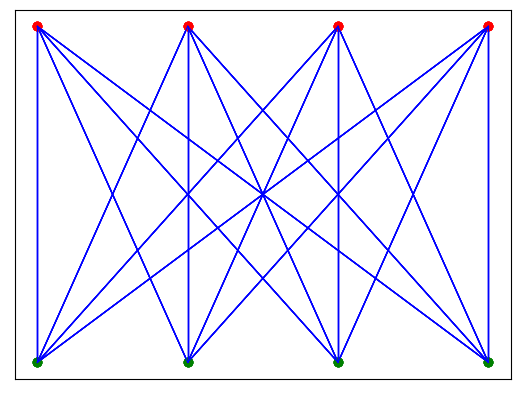

In [ ]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "all_to_all",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/l99e61hx/checkpoints/epoch=49-step=3950.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_all_to_all)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### По схеме "все к одному" (к наибольшему слою учителя)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/sfgwl45p/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/sfgwl45p/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.22136051952838898    │
│         AUC_Noise         │    0.2562948763370514     │
│         test_acc          │    0.5724999904632568     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▅▆▆▆▅▆▆▇▆▆▇▇▇▇▇▇▇▇█▇▆█▇▆█▇▇▆▆▇▇█▇▆▇▇▇
train_loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22136
AUC_Noise,0.25629
distillation_type,all_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ytdrvy1p/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ytdrvy1p/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2199236899614334     │
│         AUC_Noise         │    0.26566922664642334    │
│         test_acc          │    0.5701000094413757     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▄▅▅▆▆▅▇▇▆▆▆▆▇▇▇█▇██▇▇█▇▇▇▇▆▇▇▇██▇▆▇█▇
train_loss,█▆▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▁▁▁▂▁▁▁▁▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21992
AUC_Noise,0.26567
distillation_type,all_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/m0bxn82e/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/m0bxn82e/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.22597894072532654    │
│         AUC_Noise         │    0.27681025862693787    │
│         test_acc          │    0.5767999887466431     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▅▃▄▅▆▅▅▆▆▆▆▅▇▇▆▆▇▆▇█▆▆▇▆▆▇▇▆▆▆▇▇█▇▆▇▇█
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22598
AUC_Noise,0.27681
distillation_type,all_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/s3k6949e/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/s3k6949e/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23066842555999756    │
│         AUC_Noise         │    0.2878551185131073     │
│         test_acc          │    0.5767999887466431     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▆█▇▇▇▇▆▆█▇▇▆▇▇▇█▇▆█▇▇
train_loss,█▆▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▂▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23067
AUC_Noise,0.28786
distillation_type,all_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ybhzcgqv/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ybhzcgqv/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.22643157839775085    │
│         AUC_Noise         │    0.2482692301273346     │
│         test_acc          │    0.5766000151634216     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▃▅▄▄▅▅▆▆▆▅▆▆▆▇▇█▇▇█▇▇▇▆▆▇▇▆▆▆▇▇▇▇▆▇▇▇
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▁▁▁▂▂▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22643
AUC_Noise,0.24827
distillation_type,all_to_one
epoch,50


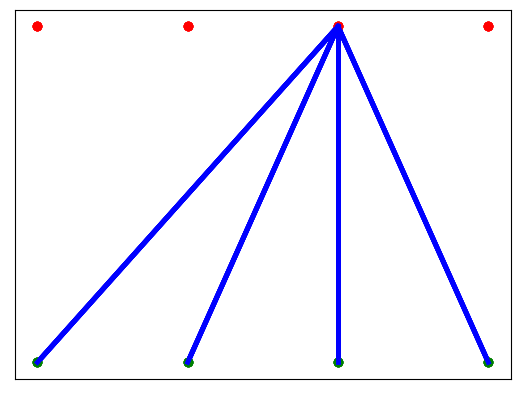

In [ ]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "all_to_one",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/l99e61hx/checkpoints/epoch=49-step=3950.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_all_to_one)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### Со случайными коэффициентами

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/tlynrqwf/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/tlynrqwf/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2232026308774948     │
│         AUC_Noise         │    0.28571152687072754    │
│         test_acc          │    0.5842000246047974     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▆▄▆▅▆▅▆▇▇▆▆▆▇▇▇▇▇▇██▇██▇▇▇▇▇▆▇▇▇█▇▆███
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.2232
AUC_Noise,0.28571
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/f01c1zur/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/f01c1zur/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23367105424404144    │
│         AUC_Noise         │    0.26725897192955017    │
│         test_acc          │    0.5674999952316284     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▅▆▅▆▅▆▆▆▆▆▆▇▇▆▇▆▆█▇▇▇▆▇▇▇▇▇▇▇▇▇█▆▇▇▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23367
AUC_Noise,0.26726
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/mnwff2uj/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/mnwff2uj/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23569999635219574    │
│         AUC_Noise         │    0.25677308440208435    │
│         test_acc          │    0.5802000164985657     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▅▄▅▄▅▅▆▆▇▆▆▆▇▇▇▆▇▆█▇▇█▇▇▆█▇▇▅▆▇▆█▇▆▇▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.2357
AUC_Noise,0.25677
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/a9i2a5zx/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/a9i2a5zx/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23342368006706238    │
│         AUC_Noise         │    0.2671000063419342     │
│         test_acc          │    0.5825999975204468     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▄▅▅▅▆▇▆▆▇▆▇▇▇▇▆█▇▇▇▇▇▆▇▇▇▆▇█▆█▆▇███
train_loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23342
AUC_Noise,0.2671
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/7crbf8tr/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/7crbf8tr/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23316052556037903    │
│         AUC_Noise         │    0.2787538468837738     │
│         test_acc          │    0.5766000151634216     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▄▅▅▆▅▅▆▇▆▇▆▇▇▇▇▇▇██▇▇▇▇▇█▇▆▇▇█▇█▇▇███
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23316
AUC_Noise,0.27875
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/zlttonzc/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/zlttonzc/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24340789020061493    │
│         AUC_Noise         │     0.25913205742836      │
│         test_acc          │    0.5809000134468079     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▅▅▅▅▆▇▆▆▆▇▇▇▇▇▇█▇▆▆▇▇▆▇▆▆▆▆▇▆█▇▆█▇▇
train_loss,█▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24341
AUC_Noise,0.25913
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/9ice3hed/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/9ice3hed/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2596263289451599     │
│         AUC_Noise         │    0.2473333328962326     │
│         test_acc          │     0.565500020980835     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▅▄▆▃▅▅▅▆▇▆▆▅▆▆▇▇▆▆▇▇▇▇▇▆▇▇▇▆▅▇▇▇█▇▇▇▇▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25963
AUC_Noise,0.24733
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/tuyqeji3/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/tuyqeji3/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24733421206474304    │
│         AUC_Noise         │    0.26057180762290955    │
│         test_acc          │    0.5645999908447266     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▅▄▆▅▆▅▅▇▆▇▆▆▇▇▇▇▆▆▇▇▆▇▇▆▇▇▆▇▆▇█▆▇▇▆███
train_loss,█▅▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24733
AUC_Noise,0.26057
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/lwjfyzmx/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/lwjfyzmx/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24594473838806152    │
│         AUC_Noise         │    0.26131922006607056    │
│         test_acc          │     0.586899995803833     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▆▄▅▅▅▇▆▆▆▆▇▇▆▇▇▆█▇▆▇▇▇▆▇▆▆▆▆▇▇█▆▇█▇▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24594
AUC_Noise,0.26132
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/0o33lrmx/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/0o33lrmx/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24009473621845245    │
│         AUC_Noise         │    0.26019102334976196    │
│         test_acc          │    0.5638999938964844     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▅▄▅▄▆▅▅▇▅▇▆▇▇▇▆▇▇▆██▇▇▇▇▆▇▇▆▆▇▇▆▇▆▆▇█▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24009
AUC_Noise,0.26019
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/x1rhondf/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/x1rhondf/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23437894880771637    │
│         AUC_Noise         │     0.260692298412323     │
│         test_acc          │    0.5809999704360962     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▃▅▅▅▅▅▆▆▆▆▆▇▆▆▆▇▆█▇▇▆▆▆▇▇▇▆▅▆▇▆▇▆▆█▇▆
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23438
AUC_Noise,0.26069
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/0pbnqip4/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/0pbnqip4/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2255815863609314     │
│         AUC_Noise         │    0.26268333196640015    │
│         test_acc          │    0.5764999985694885     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▄▆▆▅▆▇▆▆▆▆▇▆▆▇▆█▇▆▆▆▇▆▇▇▆▆▆▆▇█▆▆▇▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22558
AUC_Noise,0.26268
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/imu3i685/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/imu3i685/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2516947388648987     │
│         AUC_Noise         │    0.27929744124412537    │
│         test_acc          │    0.5874000191688538     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▅▆▅▅▆▆▅▆▆▆▆▆▆▇▆▇▇▆▇▆▆▆▆▆▆▆▆▇▆█▆▆█▇▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▂▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25169
AUC_Noise,0.2793
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/wseh3suy/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/wseh3suy/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24422894418239594    │
│         AUC_Noise         │    0.24753974378108978    │
│         test_acc          │    0.5577999949455261     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▃▅▄▅▅▅▇▇▆▅▆▇▇▇▇▇▆█▇▇▇▇▇▆▇▇▇▅▇▇▆█▇▇██▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24423
AUC_Noise,0.24754
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/vojuy6zs/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/vojuy6zs/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.25212106108665466    │
│         AUC_Noise         │    0.2692423164844513     │
│         test_acc          │    0.5616000294685364     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▅▅▆▅▇▇▅▆▆▆▇▇▇█▆█▇▇▇▇▇▇█▆▇▅▆▆▇█▇▆███
train_loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25212
AUC_Noise,0.26924
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/uebjmhz6/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/uebjmhz6/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2628973722457886     │
│         AUC_Noise         │    0.28306153416633606    │
│         test_acc          │    0.5692999958992004     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▃▅▄▆▅▅▇▇▇▆▆▇▇▇█▇▇██▆▇▇▆▇▇▇▆▅▇▇█▇▇▇██▇
train_loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.2629
AUC_Noise,0.28306
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/al5ldd58/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/al5ldd58/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2445342093706131     │
│         AUC_Noise         │    0.26708462834358215    │
│         test_acc          │     0.586899995803833     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▄▆▅▆▅▆▆▆▆▆▆▇▇▇▇█▇▇▇▆▇▇▇▆▇▇▇▆▆▇▇█▇▇█▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24453
AUC_Noise,0.26708
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/v3cc8j7q/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/v3cc8j7q/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.21796579658985138    │
│         AUC_Noise         │    0.28250256180763245    │
│         test_acc          │     0.583899974822998     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▅▅▅▅▆▅▅▇▇▆▇▇▆▇▇▇▇▆▇▇▇▇▇▇▆▇▆▇▆▆▇▆█▆▆█▇▇
train_loss,█▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21797
AUC_Noise,0.2825
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/9bkqmliy/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/9bkqmliy/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2555868327617645     │
│         AUC_Noise         │    0.25739744305610657    │
│         test_acc          │    0.5511999726295471     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▅▄▅▄▅▅▆▇▇▆▆▇▇▇▇▇▇▆█▇▇▇▇▇▆▇▇▇▆▆▇▇▇▇▆▇▇▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25559
AUC_Noise,0.2574
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/hfn0tz2j/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/hfn0tz2j/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.21892894804477692    │
│         AUC_Noise         │    0.2415499985218048     │
│         test_acc          │    0.5819000005722046     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▄▅▅▆▄▅▆▆▆▅▅▆▇▇▆▇▇█▇▆▇▇▆▆▇▆▆▆▆▆▆▇▇▆█▇▇
train_loss,█▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21893
AUC_Noise,0.24155
distillation_type,random
epoch,50


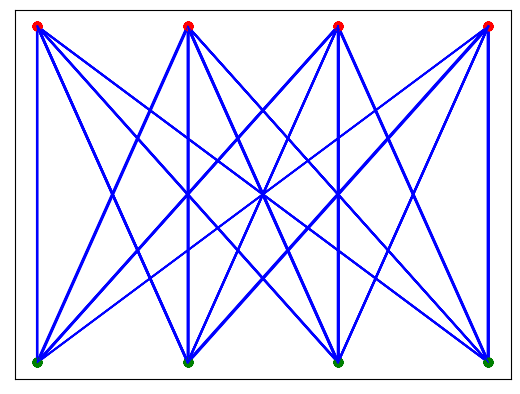

In [10]:
for _ in range(20):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "random",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/l99e61hx/checkpoints/epoch=49-step=3950.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=random_coeffs())
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### Optuna

In [6]:
def objective(trial):
    beta = 0.5

    coeffs = []
    for i in range(4):
        for j in range(4):
            coeffs.append(trial.suggest_float(f"l_{i}_{j}", 0.00001, 1, log=True))
    l_sum = sum(coeffs)
    trial.set_user_attr(f"l_sum", l_sum)
    for i in range(len(coeffs)):
        coeffs[i] /= l_sum
    
    teacher = Base_Model.load_from_checkpoint("./lightning_logs/l99e61hx/checkpoints/epoch=49-step=3950.ckpt", model=Cifar_Tiny(10)).model
    model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs, beta=beta)
    trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
    trainer.fit(model=model, train_dataloaders=train_loader)
    trainer.test(dataloaders=test_loader)
    return model.test_acc

In [7]:
wandb_kwargs = {
            "project": "Oleinik-BS-Thesis-code",
            "entity": "potapuch2001",
            "reinit": True,
        }
wandbc = WeightsAndBiasesCallback(metric_name="test_acc")

/tmp/ipykernel_3859/1253110053.py:6: ExperimentalWarning: WeightsAndBiasesCallback is experimental (supported from v2.9.0). The interface can change in the future.
  wandbc = WeightsAndBiasesCallback(metric_name="test_acc")
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: potapuch2001. Use `wandb login --relogin` to force relogin


[I 2024-06-19 12:06:24,525] A new study created in memory with name: no-name-b8c0fafa-16e9-47d3-85ca-82b012e7d737
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | 

Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 33.77it/s, v_num=sbhq]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 33.63it/s, v_num=sbhq]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:06<00:00, 12.18it/s] 

[I 2024-06-19 12:08:30,058] Trial 0 finished with value: 0.5502 and parameters: {'l_0_0': 3.1141102769197454e-05, 'l_0_1': 0.01780510756567806, 'l_0_2': 6.814300958047965e-05, 'l_0_3': 0.1122244015630784, 'l_1_0': 0.0001918732050535396, 'l_1_1': 0.0002246835871353503, 'l_1_2': 1.5382857952092348e-05, 'l_1_3': 0.004709494146953081, 'l_2_0': 0.003171054315996795, 'l_2_1': 0.006690329177737842, 'l_2_2': 0.004669379055248045, 'l_2_3': 5.7118231741064866e-05, 'l_3_0': 0.0024602092952250034, 'l_3_1': 0.008825338811340011, 'l_3_2': 0.025125914491575693, 'l_3_3': 0.0045864952745129405}. Best is trial 0 with value: 0.5502.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not de


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17860263586044312
        AUC_Noise           0.36828333139419556
        test_acc            0.5501999855041504
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 30.28it/s, v_num=sbhq]

wandb: WARNING Step only supports monotonically increasing values, use define_metric to set a custom x axis. For details see: https://wandb.me/define-metric
wandb: WARNING (User provided step: 0 is less than current step: 84. Dropping entry: {'l_0_0': 3.1141102769197454e-05, 'l_0_1': 0.01780510756567806, 'l_0_2': 6.814300958047965e-05, 'l_0_3': 0.1122244015630784, 'l_1_0': 0.0001918732050535396, 'l_1_1': 0.0002246835871353503, 'l_1_2': 1.5382857952092348e-05, 'l_1_3': 0.004709494146953081, 'l_2_0': 0.003171054315996795, 'l_2_1': 0.006690329177737842, 'l_2_2': 0.004669379055248045, 'l_2_3': 5.7118231741064866e-05, 'l_3_0': 0.0024602092952250034, 'l_3_1': 0.008825338811340011, 'l_3_2': 0.025125914491575693, 'l_3_3': 0.0045864952745129405, 'test_acc': 0.5502, '_timestamp': 1718788110.059559}).
wandb: WARNING (User provided step: 1 is less than current step: 168. Dropping entry: {'l_0_0': 0.08014398147161889, 'l_0_1': 0.14822933757899742, 'l_0_2': 0.010570920078804375, 'l_0_3': 0.016565225

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 30.16it/s, v_num=sbhq]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v1.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.08it/s] 

[I 2024-06-19 12:10:33,253] Trial 1 finished with value: 0.491 and parameters: {'l_0_0': 0.08014398147161889, 'l_0_1': 0.14822933757899742, 'l_0_2': 0.010570920078804375, 'l_0_3': 0.016565225621350557, 'l_1_0': 0.000623996934142928, 'l_1_1': 0.0002860780942481143, 'l_1_2': 0.5824316268956206, 'l_1_3': 0.5170651719597091, 'l_2_0': 3.572021176476242e-05, 'l_2_1': 0.3210220309003108, 'l_2_2': 0.0038182127927296706, 'l_2_3': 0.016249739801716078, 'l_3_0': 0.3137117371731568, 'l_3_1': 0.008869872227254477, 'l_3_2': 0.04808964508307698, 'l_3_3': 0.30991606414352296}. Best is trial 0 with value: 0.5502.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21899209916591644
        AUC_Noise           0.37937819957733154
        test_acc            0.4909999966621399
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 31.16it/s, v_num=sbhq]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 31.03it/s, v_num=sbhq]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v2.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v2.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.37it/s] 

[I 2024-06-19 12:12:38,741] Trial 2 finished with value: 0.5669 and parameters: {'l_0_0': 1.5786187044892654e-05, 'l_0_1': 0.0022128719469442656, 'l_0_2': 2.345758370397323e-05, 'l_0_3': 3.730492373432134e-05, 'l_1_0': 0.0003614333880149422, 'l_1_1': 2.191847657487416e-05, 'l_1_2': 0.6998326544583373, 'l_1_3': 0.12417925922471904, 'l_2_0': 0.0001690782013145875, 'l_2_1': 0.9350531688555811, 'l_2_2': 0.000641920046396844, 'l_2_3': 0.500775790711265, 'l_3_0': 0.0005185006815827812, 'l_3_1': 0.0027900932725612344, 'l_3_2': 0.23262228754647443, 'l_3_3': 0.0007357742347763992}. Best is trial 2 with value: 0.5669.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired,


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.19511842727661133
        AUC_Noise           0.38118845224380493
        test_acc            0.5669000148773193
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 33.13it/s, v_num=sbhq]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 32.99it/s, v_num=sbhq]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v3.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v3.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 13.73it/s]  

[I 2024-06-19 12:14:41,288] Trial 3 finished with value: 0.1 and parameters: {'l_0_0': 0.0447194309478541, 'l_0_1': 0.006285932159377963, 'l_0_2': 0.0003439955474773414, 'l_0_3': 0.0003995009994454879, 'l_1_0': 0.0012104794816728082, 'l_1_1': 0.027041637005551067, 'l_1_2': 0.0003519417144636245, 'l_1_3': 2.03437690209817e-05, 'l_2_0': 0.7042719584283746, 'l_2_1': 0.3098197629718817, 'l_2_2': 0.0019459676280729203, 'l_2_3': 0.0007727066165568352, 'l_3_0': 0.10615903047619976, 'l_3_1': 0.03907808639979215, 'l_3_2': 0.000735793579515514, 'l_3_3': 0.014862073914979304}. Best is trial 2 with value: 0.5669.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 35.20it/s, v_num=sbhq]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 79/79 [00:02<00:00, 35.08it/s, v_num=sbhq]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v4.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/3nuosbhq/checkpoints/epoch=49-step=3950-v4.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.36it/s] 

[I 2024-06-19 12:16:43,056] Trial 4 finished with value: 0.4941 and parameters: {'l_0_0': 0.25946912939248484, 'l_0_1': 0.00029584536866193256, 'l_0_2': 0.4752224671912834, 'l_0_3': 5.5732946992153e-05, 'l_1_0': 0.0001707162568641784, 'l_1_1': 5.511030032308815e-05, 'l_1_2': 0.01663731631046304, 'l_1_3': 6.413918098592803e-05, 'l_2_0': 0.02758900480365566, 'l_2_1': 0.44661571030248776, 'l_2_2': 0.011218475341100787, 'l_2_3': 0.10294542348537293, 'l_3_0': 1.44158627251078e-05, 'l_3_1': 0.02675305612783809, 'l_3_2': 0.010797977828448317, 'l_3_3': 2.086752337545995e-05}. Best is trial 2 with value: 0.5669.



────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.13617368042469025
        AUC_Noise           0.29855769872665405
        test_acc            0.49410000443458557
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


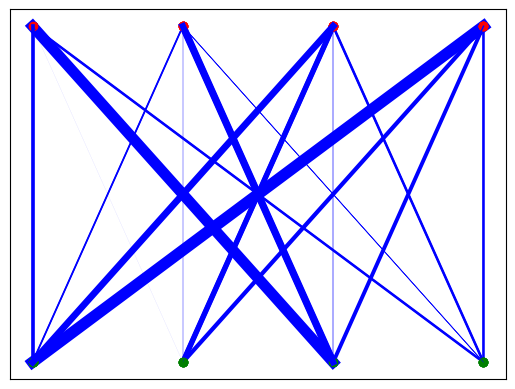

In [8]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, callbacks=[wandbc])

In [9]:
f = "best_{}".format
for param_name, param_value in study.best_trial.params.items():
    wandb.run.summary[f(param_name)] = param_value

wandb.run.summary["best accuracy"] = study.best_trial.value

wandb.log(
    {
        "optuna_optimization_history": optuna.visualization.plot_optimization_history(
            study
        ),
        "optuna_param_importances": optuna.visualization.plot_param_importances(
            study
        ),
    }
)

wandb.finish()

AUC_FGSM,▆█▇▁▃
AUC_Noise,███▁▆
epoch,▁▂▃▄▅▅▇▇▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█
lr,▁▁▁▁▁
test_acc,█▇█▁▇
train_acc,▄▅▅▆▆▇▆▇▁▄▅▅▆▅▅▆▅▆▆▇▆▇▇▇▁▁▁▁▁▂▁▁▅▇▇▇▇█▇█
train_loss,▃▂▂▂▁▁▁▁█▆▅▅▄▄▄▄▃▂▂▂▂▂▂▂ ▄▃▂▂▂▂▂▂
trainer/global_step,▁▂▃▄▅▅▇▇▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█
AUC_FGSM,0.13617
AUC_Noise,0.29856
best accuracy,0.5669
